In [1]:
import warnings

import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import pymc_bart as pmb

warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
RANDOM_SEED = 8457
rng = np.random.RandomState(RANDOM_SEED)
az.style.use("arviz-white")
plt.rcParams["figure.dpi"] = 300

In [3]:
cancer = pd.read_csv("cervical_cancer.csv", na_values=["?"])

In [4]:
Y = cancer.pop("Biopsy")
X = cancer

In [5]:
with pm.Model() as model:
    μ = pmb.BART("μ", X, Y, m=200)
    y = pm.Binomial("y", n=1, p=pm.math.sigmoid(μ), observed=Y)
    idata = pm.sample(
        tune=2000, chains=4, random_seed=RANDOM_SEED, compute_convergence_checks=False
    )

Multiprocess sampling (4 chains in 4 jobs)
PGBART: [μ]


/home/osvaldo/proyectos/00_BM/pymc-devs/pymc-bart/pymc_bart/pgbart.py:304: RuntimeWarning: invalid value encountered in subtract
  log_w_ = log_w - log_w_max
/home/osvaldo/proyectos/00_BM/pymc-devs/pymc-bart/pymc_bart/pgbart.py:304: RuntimeWarning: invalid value encountered in subtract
  log_w_ = log_w - log_w_max
/home/osvaldo/proyectos/00_BM/pymc-devs/pymc-bart/pymc_bart/pgbart.py:304: RuntimeWarning: invalid value encountered in subtract
  log_w_ = log_w - log_w_max
/home/osvaldo/proyectos/00_BM/pymc-devs/pymc-bart/pymc_bart/pgbart.py:304: RuntimeWarning: invalid value encountered in subtract
  log_w_ = log_w - log_w_max
Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 169 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for relia

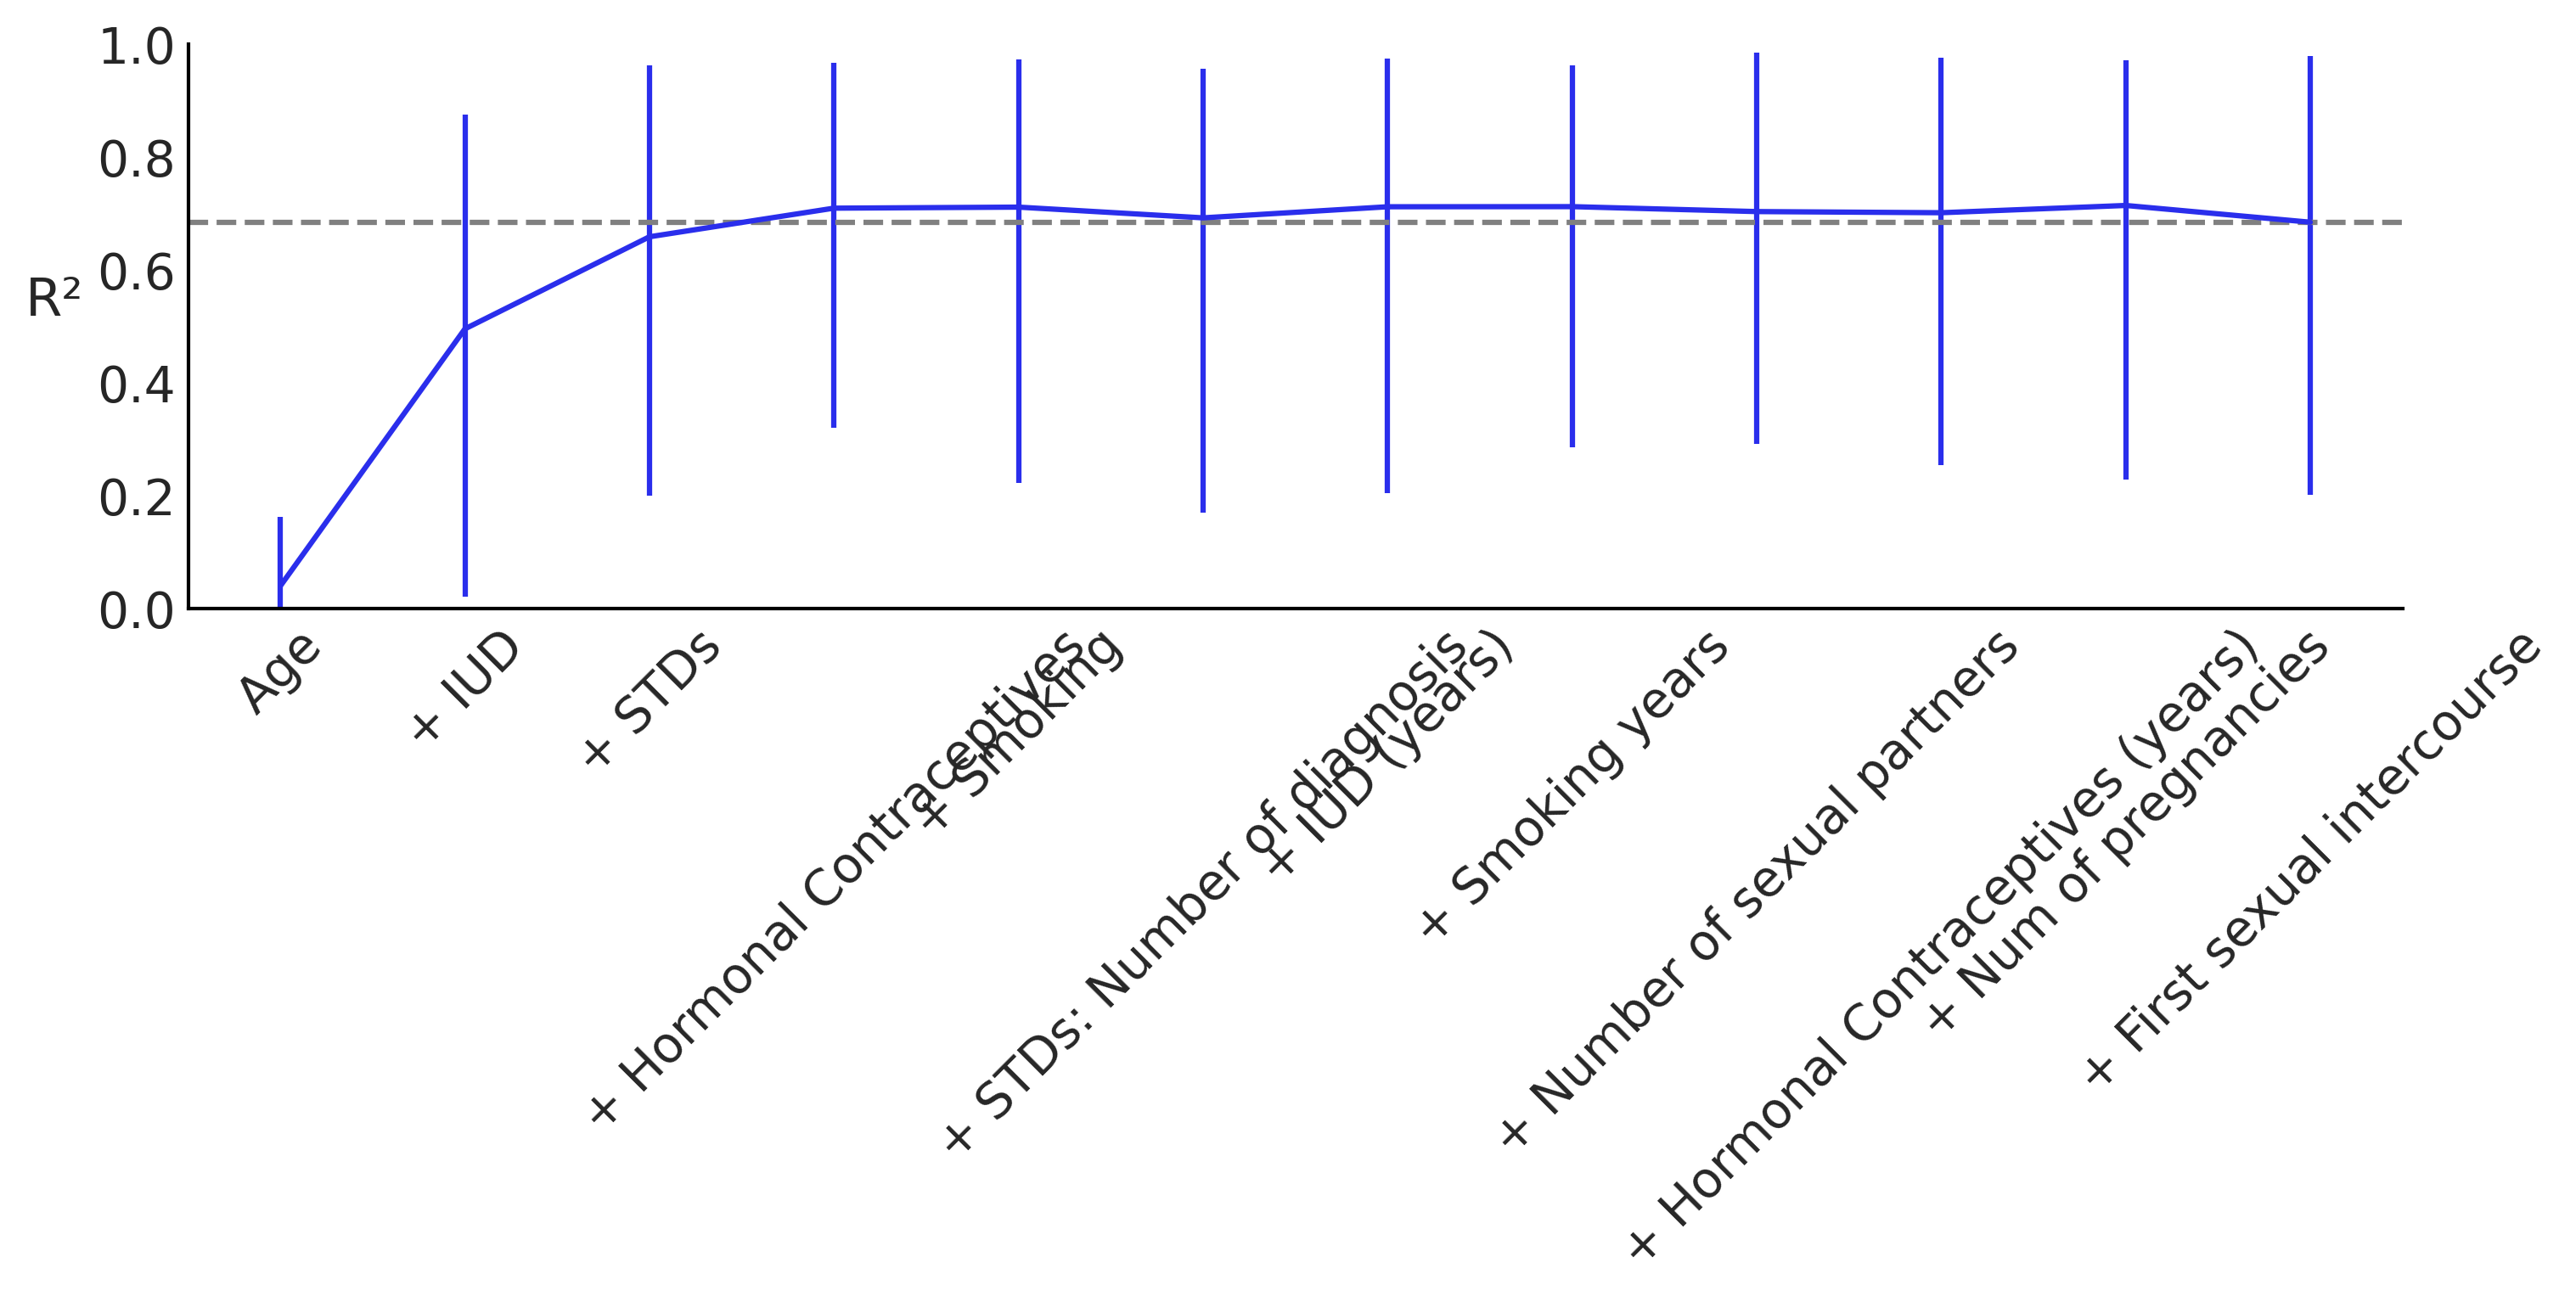

In [6]:
indices_vi, _ = pmb.utils.plot_variable_importance(
    idata, μ, X, method="VI", xlabel_angle=45, figsize=(10, 5)
);

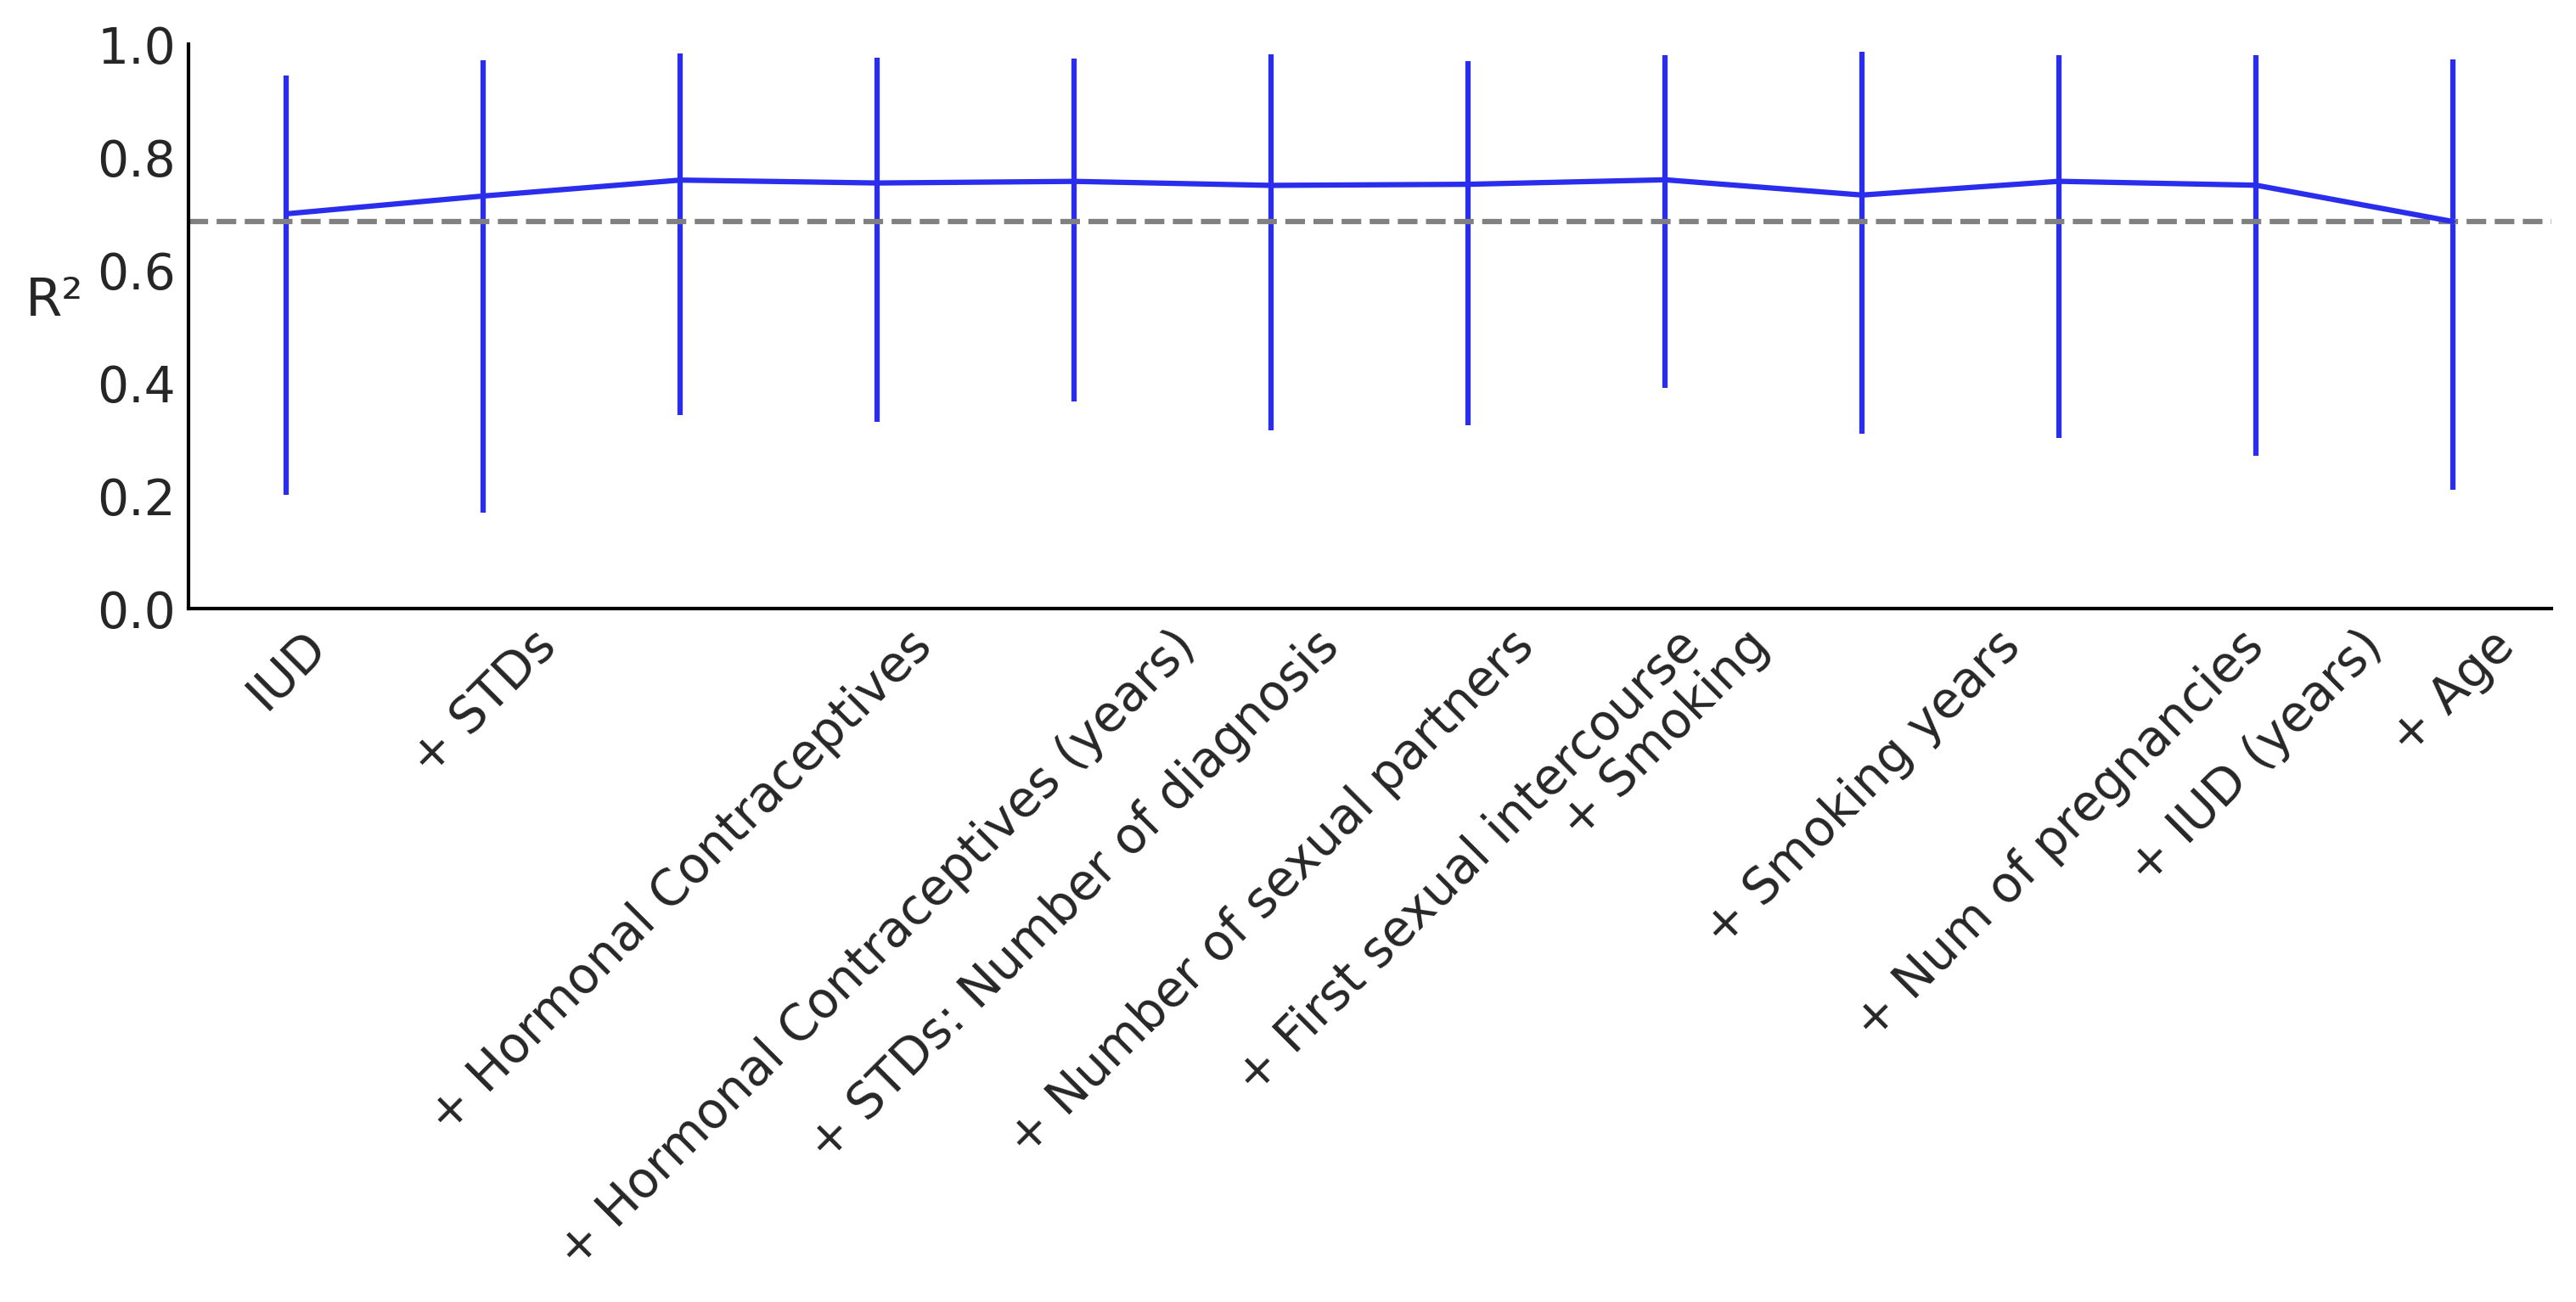

In [7]:
indices_bw, _ = pmb.utils.plot_variable_importance(
    idata, μ, X, method="backward", xlabel_angle=45, figsize=(10, 5)
);

## Explicit computation of R² following method="VI" order, with m=50

## Explicit computation of R² following method="backward" order, with m=50

## ...